<center>

#  Business Case: Netflix EDA

<img src="https://media.tenor.com/QJNoPeq9WmUAAAAC/netflix-intro-netflix.gif">

# Business Problem
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries


# Netflix Dataset 

## About Netflix

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description

# Objectives of the Project

* Perform EDA on the given dataset and find insights.
* Provide Useful Insights and Business recommendations that can help the business to grow.

# 1 Importing all the necessary libraries and data for analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("setup complete!")

setup complete!


Here are the first 5 rows of the data

In [2]:
netflix_df = pd.read_csv(r"C:\Users\tripa\Downloads\DAV\Netflix_Use_Case\netflix_data.csv")
print(netflix_df.shape)
netflix_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tripa\\Downloads\\DAV\\Netflix_Use_Case\\netflix_data.csv'

Total data frame has 8807 rows and 12 columns

Here is the data breakdown in a concise manner 

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Let's find some more data insights 

In [ ]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

It seems that show_id column has all unique values, 
Title column has all unique values i.e. total 8807 which equates with total rows in the dataset.
Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

Let's check the data types we ought to be dealing with

In [ ]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


looking for duplicate entries 

In [ ]:
print("Count of Duplicated rows is :",netflix_df.duplicated().sum())

Count of Duplicated rows is : 0


Looking for Nan / Null values 

In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

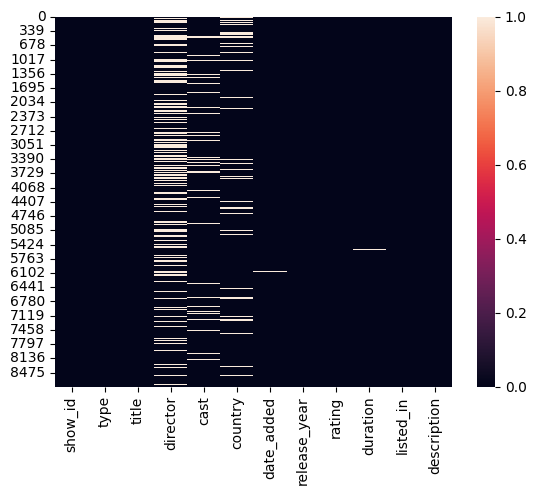

In [ ]:
sns.heatmap(netflix_df.isnull())

Let's find out the percentage of null values so as to make a decision about dropping 

In [ ]:
print(f'the total percentage null values are as follows:\n {netflix_df.isnull().sum() / len(netflix_df) * 100}')

the total percentage null values are as follows:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


It can be seen that the Director, cast and country have a really big chunk of data missing, while rating, duration and date_added have slightly less data missing

it is significant that we get the missing data to have a proper exploration

## Checking the missing Duration 

In [ ]:
netflix_df[netflix_df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### It can be seen that the duration column values have been mistakenly put in rating column, we can move them back to the duration as this would make better sense

In [ ]:
missing_duration = list(netflix_df[netflix_df.duration.isna()]['show_id'])
missing_duration

['s5542', 's5795', 's5814']

In [ ]:
netflix_df.loc[netflix_df['show_id'].isin(missing_duration), 'duration'] = netflix_df.loc[netflix_df['show_id'].isin(missing_duration), 'rating']
netflix_df.loc[netflix_df.show_id.isin(missing_duration), 'rating'] = None

In [ ]:
netflix_df[netflix_df.show_id.isin(missing_duration)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,None,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,None,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,None,66 min,Movies,The comic puts his trademark hilarious/thought...


Now if compare the Null values from before, we observe the Duration column has everything now

In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Now Let's try to resolve the Rating column's data in order, we will use mode for each category i.e. for Movies and for Tv Shows

In [ ]:
netflix_df[netflix_df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,None,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,None,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,None,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', None, 'NR', nan, 'TV-Y7-FV', 'UR'],
      dtype=object)

In [ ]:
movies_df = netflix_df[netflix_df.type == 'Movie']

mode_rating = movies_df.rating.mode()

mode_rating


0    TV-MA
Name: rating, dtype: object

In [ ]:
movies_mode_rating = netflix_df[netflix_df.type == 'Movie']['rating'].mode()[0]

netflix_df.loc[netflix_df.type == 'Movie' , 'rating'] = netflix_df.loc[netflix_df.type == 'Movie','rating'].fillna(movies_mode_rating)

In [ ]:
netflix_df[netflix_df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [ ]:
tv_df = netflix_df[netflix_df.type == 'TV Show']

mode_rating_tv = movies_df.rating.mode()

tv_mode_rating = netflix_df[netflix_df.type == 'TV Show']['rating'].mode()[0]

netflix_df.loc[netflix_df.type == 'TV Show' , 'rating'] = netflix_df.loc[netflix_df.type == 'TV Show','rating'].fillna(tv_mode_rating)

In [ ]:
netflix_df[netflix_df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### now we have the rating column filled with Mode for the respective category

Now trying to fill the values for date_added column that hvae null values 

In [ ]:
netflix_df[netflix_df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
list_of_years = list(netflix_df[netflix_df.date_added.isna()]['release_year'])
list_of_years

[2013, 2018, 2003, 2003, 2008, 2010, 2012, 2016, 2015, 2015]

In [ ]:
tv_shows_2013 = netflix_df[(netflix_df['release_year'] == 2013) & (netflix_df['type'] == 'TV Show') & (netflix_df['date_added'].notnull())]

In [ ]:
for year in list_of_years:
    if netflix_df['date_added'].dtype == 'object':
        # Adjust the format string to match the actual format of your date strings
        netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y')
    else:
        pass
    tv_shows_2013 = netflix_df[(netflix_df['release_year'] == year) & (netflix_df['type'] == 'TV Show') & (netflix_df['date_added'].notnull())]
    mode_date_added = tv_shows_2013['date_added'].mode()[0]
    netflix_df.loc[(netflix_df['release_year'] == year) & (netflix_df['type'] == 'TV Show') & netflix_df['date_added'].isnull(), 'date_added'] = mode_date_added


In [ ]:
netflix_df[netflix_df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8807 non-null   datetime64[ns]
 1   year_added   8807 non-null   int32         
 2   month_added  8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 137.7 KB


Hence the date_added column is now fixed for all 

#### moving on for actors', Director and country data

In [ ]:
columns_with_missing = ['director', 'cast', 'country']
for col in columns_with_missing:
    netflix_df[col] = netflix_df[col].fillna(netflix_df.groupby('type')[col].transform(lambda x: x.mode()[0]))
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Alastair Fothergill,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Alastair Fothergill,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Alastair Fothergill,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

For Directors column 

In [ ]:
# Filter out groups with no non-null values in the director column
non_null_director = netflix_df['director'].notna()
grouped = netflix_df.loc[non_null_director].groupby('country')

# Calculate mode of directors for each non-empty country group
mode_director = grouped['director'].transform(lambda x: x.mode().iloc[0])

# Fill missing values with mode
netflix_df['director'] = netflix_df['director'].fillna(mode_director)

## Data Exploration and Non Graphical informations

In [ ]:
# 2 types of content present in dataset - either Movie or TV Show
netflix_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
movies  = netflix_df.loc[netflix_df['type'] == 'Movie']
tv_shows = netflix_df.loc[netflix_df['type'] == 'TV Show'] 

In [ ]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [ ]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

we can clearly observe that the Movies and Duration have two different format of Duration, hence we ought to work with them independently with Movies in minutes and TV Shows in seasons

In [ ]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)
tv_shows.duration_in_seasons


1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2676, dtype: float64

In [ ]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [ ]:
timeperiod = pd.Series((netflix_df['date_added'].min().strftime('%B %Y') , netflix_df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

first            January 2008
Most Recent    September 2021
dtype: object

The first movie was added in January 2008 and the most recent one was in september 2021, this also points out that the data is 3 years old

What about the release year for movies?

In [ ]:
netflix_df.release_year.min() , netflix_df.release_year.max() 

(1925, 2021)

The oldest movie is from 1925 and the latest one is from 2021 as per the release date

In [ ]:
netflix_df.loc[(netflix_df.release_year == netflix_df.release_year.min()) | (netflix_df.release_year == netflix_df.release_year.max())].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Alastair Fothergill,David Attenborough,United States,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,Alastair Fothergill,Evelyn Lewis Prieto,United States,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,Alastair Fothergill,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,Alastair Fothergill,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,Alastair Fothergill,David Attenborough,United States,2021-07-14,2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ...",2021,7
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,United States,2021-07-14,2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...,2021,7
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",United States,2021-07-14,2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr...",2021,7
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",United States,2021-07-13,2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t...",2021,7


Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.?

In [ ]:
netflix_df.groupby(['type' , 'rating'])['show_id'].count()

type     rating  
Movie    G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2067
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             5
         R              2
         TV-14        733
         TV-G          94
         TV-MA       1147
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
Name: show_id, dtype: int64

moving on with columns having maximum null values

* Country Columns 

In [ ]:
netflix_df['country'].value_counts()

country
United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

* We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

* This makes it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country column into different rows.

* we are Creating a separate table for country , to avoid the duplicasy of records in our origional table after exploding.

In [ ]:
country_df = netflix_df[['show_id' , 'type' , 'country']]
country_df.dropna(inplace = True)
country_df['country'] = country_df['country'].apply(lambda x : x.split(','))
country_df = country_df.explode('country')
country_df

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,United States
3,s4,TV Show,United States
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_df['country'] = country_df['country'].str.strip()
country_df.loc[country_df['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [ ]:
country_df = country_df.loc[country_df['country'] != '']
country_df['country'].nunique()

122

There are a total of 122 countries with Netflix

Total movies and tv shows in each country?

In [ ]:
x = country_df.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,3192.0,1329.0
India,962.0,84.0
United Kingdom,534.0,272.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


* Director Column

In [ ]:
netflix_df['director'].value_counts()

director
Alastair Fothergill               2449
Rajiv Chilaka                      207
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

There are some movies which are directed by multiple directors. Hence multiple names of directors are given in comma separated format.
We will explode the director column as well. It will create many duplicate records in originaltable hence we created separate table for directors.

In [ ]:
dir_tb = netflix_df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
1,s2,TV Show,[Alastair Fothergill]
2,s3,TV Show,[Julien Leclercq]
3,s4,TV Show,[Alastair Fothergill]
4,s5,TV Show,[Alastair Fothergill]
...,...,...,...
8802,s8803,Movie,[David Fincher]
8803,s8804,TV Show,[Alastair Fothergill]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [ ]:
dir_tb = dir_tb.explode('director')
dir_tb['director'] = dir_tb['director'].str.strip()
# checking if empty stirngs are there in director column
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

director
False    9612
Name: count, dtype: int64

In [ ]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
1,s2,TV Show,Alastair Fothergill
2,s3,TV Show,Julien Leclercq
3,s4,TV Show,Alastair Fothergill
4,s5,TV Show,Alastair Fothergill
...,...,...,...
8802,s8803,Movie,David Fincher
8803,s8804,TV Show,Alastair Fothergill
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [ ]:
dir_tb['director'].nunique()

4993

* There are a total 4993 unique directors in the dataset

* Total movies and tv shows directed by each other

In [ ]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,210.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


* listed_in column to understand more details 

In [ ]:
genre_tb = netflix_df[['show_id' , 'type', 'listed_in']]
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

There are a total of 42 genres in this dataset

In [ ]:
netflix_df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

Movies have 20 genres and TV shows have 22 genres

In [ ]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,176.0
British TV Shows,NaN,253.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,28.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,470.0


Exploring the cast column now

In [ ]:
cast_df = netflix_df[['show_id' , 'type' ,'cast']]
cast_df.dropna(inplace = True)
cast_df['cast'] = cast_df['cast'].apply(lambda x : x.split(','))
cast_df = cast_df.explode('cast')
cast_df

,show_id,type,cast
0,s1,Movie,Vatsal Dubey
0,s1,Movie,Julie Tejwani
0,s1,Movie,Rupa Bhimani
0,s1,Movie,Jigna Bhardwaj
0,s1,Movie,Rajesh Kava
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast_df['cast'] = cast_df['cast'].str.strip()
cast_df[cast_df['cast'] == '']

,show_id,type,cast


In [ ]:
# Total actors on the Netflix
cast_df.cast.nunique()

36439

In [ ]:
# Total movies/TV shows by each actor
x = cast_df.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
David Attenborough,6.0,364.0
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


### Finding the most famous actor

In [ ]:
exploded_df = netflix_df.explode('cast')
individual_cast = exploded_df['cast'].str.split(', ', expand=True).stack()
individual_cast_counts = individual_cast.value_counts()
most_frequent_cast_member = individual_cast_counts.idxmax()

print(f"The person in the cast who has been in the most movies is: {most_frequent_cast_member}")


The person in the cast who has been in the most movies is: Julie Tejwani


## Visual Analysis - Univariate & Bivariate

Distribution of content across the different types

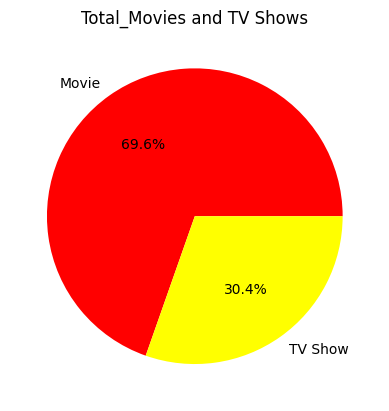

In [ ]:
types = netflix_df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['Red' , 'Yellow'])
plt.title('Total_Movies and TV Shows')
plt.show()

It can be seen that 69.6% content is Movies an 30.4% content is TV shows

Distribution of 'date_added' column

 How has the number of movies/TV shows added on Netflix per year changed over the time?

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
d = netflix_df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

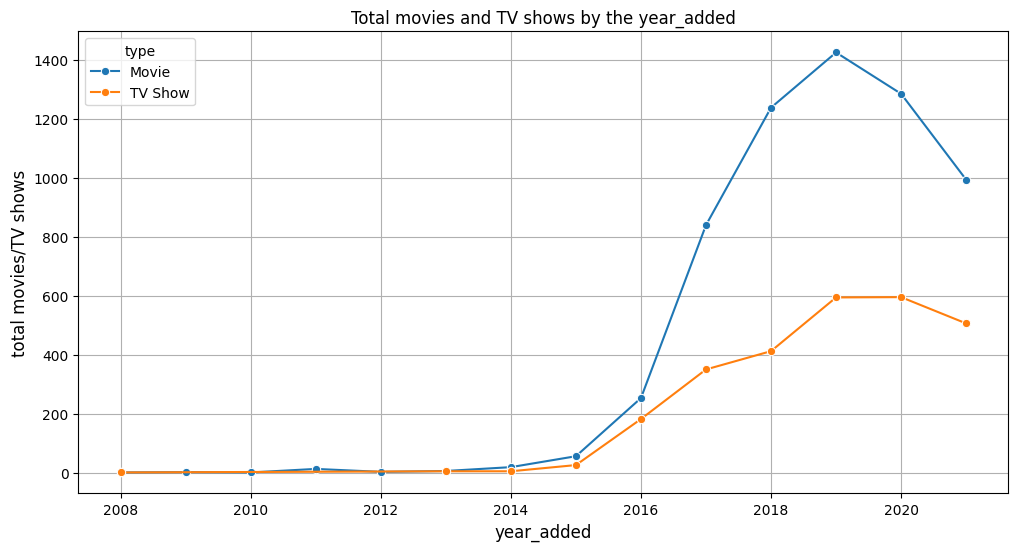

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=d, x='year_added', y='total movies/TV shows', hue='type', marker='o', ms=6)
plt.xlabel('year_added', fontsize=12)
plt.ylabel('total movies/TV shows', fontsize=12)
plt.title('Total movies and TV shows by the year_added', fontsize=12)
plt.grid(True)
plt.show()

Observation: 
   * The content added on the Netflix surged drastically after 2015.
   * 2019 marks the highest number of movies and TV shows added on the Netflix.
   * Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic.
    But still , TV shows content have not dropped as drastic as movies. In recent years TV shows are focussed more than Movies.

Distribution of 'Release_year' column

How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
d = netflix_df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


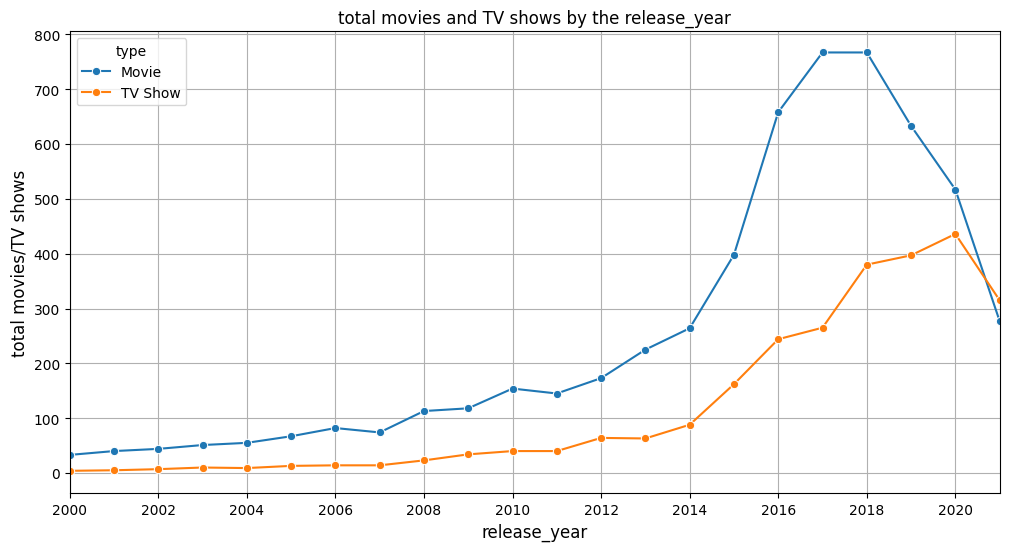

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.grid(True)
plt.show()

Observation: 
   * 2018 marks the highest number of movie and TV show releases. 
   * Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
   * In recent years TV shows are focussed more than Movies.
   * The yearly number of releases has surged drastically from 2015.

Total movies/TV shows by each director

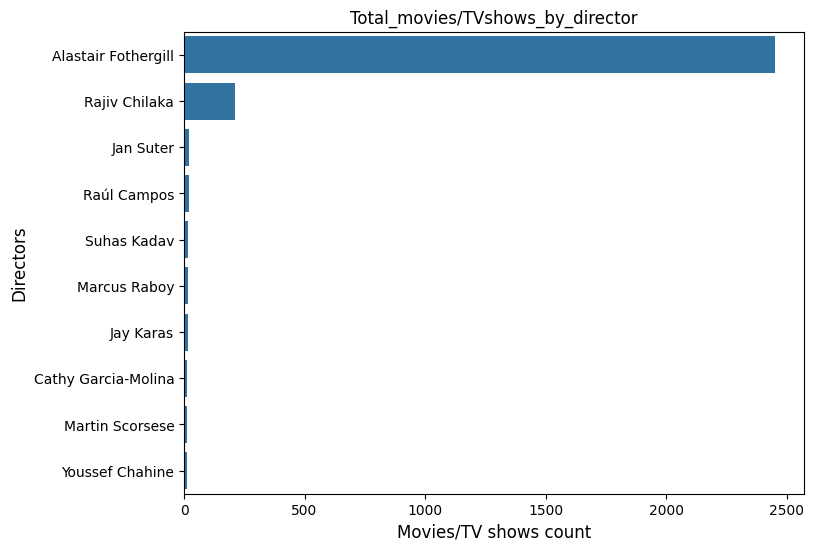

In [ ]:
# total Movies directed by top 10 directors
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observation:
   * The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

Checking Outliers for number of movies directed by each director

In [ ]:
x = dir_tb.director.value_counts()
x

director
Alastair Fothergill    2450
Rajiv Chilaka           210
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
                       ... 
Raymie Muzquiz            1
Stu Livingston            1
Joe Menendez              1
Eric Bross                1
Mozez Singh               1
Name: count, Length: 4993, dtype: int64

In [ ]:
def calculate_outliers(data):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (Q3)
    q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers in the dataset
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    
    return outliers


def calculate_max_occurred_value(data):
    # Calculate the unique values and their counts in the dataset
    unique_values, value_counts = np.unique(data, return_counts=True)
    
    # Find the index of the maximum count
    max_count_index = np.argmax(value_counts)
    
    # Retrieve the corresponding unique value with the maximum count
    max_occurred_value = unique_values[max_count_index]
    
    return max_occurred_value

In [ ]:
outliers = calculate_outliers(x)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(x)  # Implement your method to find the maximum-occurred value
set(outliers) 

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21, 210, 2450}

In [ ]:
max_occurred_value

1

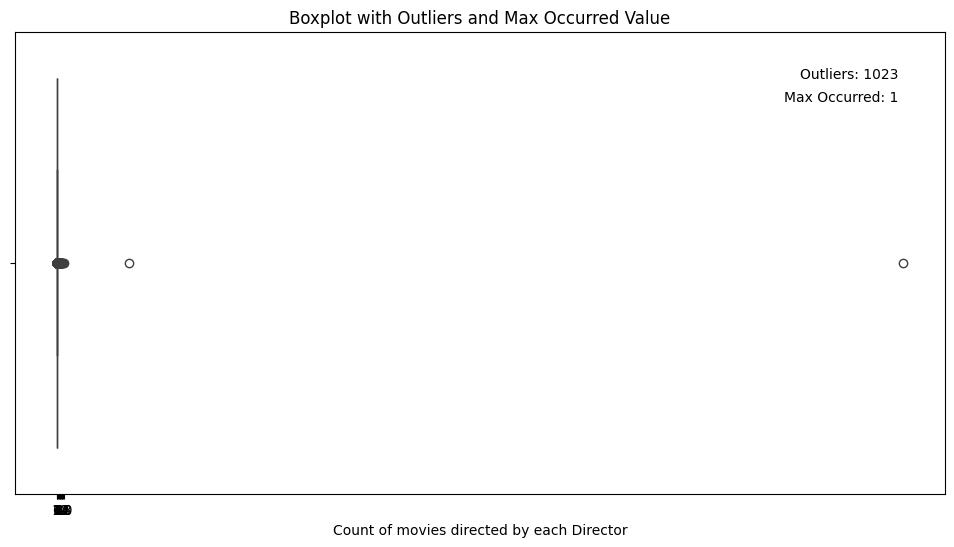

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data=x, showfliers=True, whis=1.5 , orient = 'h')

# Calculate the outliers and maximum-occurred value
outliers = calculate_outliers(x)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(x)  # Implement your method to find the maximum-occurred value

# Annotate the plot
plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f"Max Occurred: {max_occurred_value}", transform=plt.gca().transAxes, ha='right')


plt.xlabel("Count of movies directed by each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occurred Value")

# Show the plot
plt.show()

It is Observed that maximum occured value is 1, which means maximum directors on the Netflix have directed 1 movie/Tv show. There are few directors who have directed more than 1 movies/tv shows and they are outliers.

Total movies/TV shows by each country

In [ ]:
# Lets check for top 10 countries
top_10_country = country_df.country.value_counts().head(10).index
df_new = country_df.loc[country_df['country'].isin(top_10_country)]

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,3192,1329
India,962,84
United Kingdom,534,272
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,199
Mexico,111,58


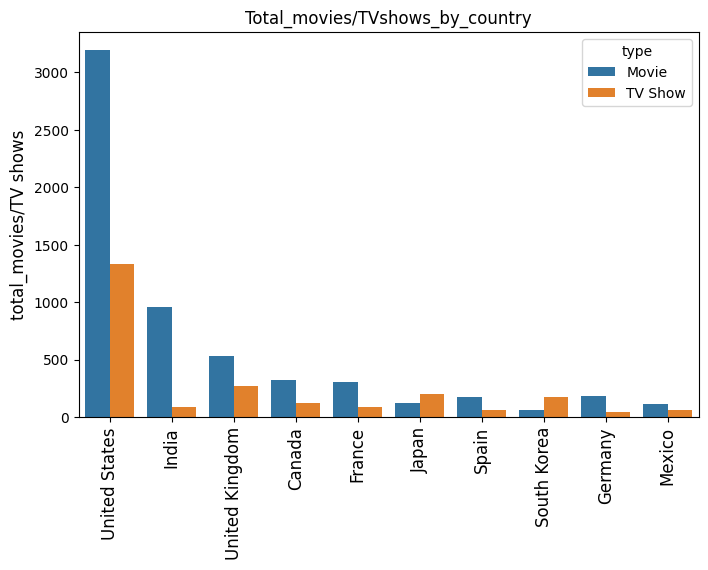

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [ ]:
top_10_country = country_df.country.value_counts().head(10).index
country_df['cat'] = country_df['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

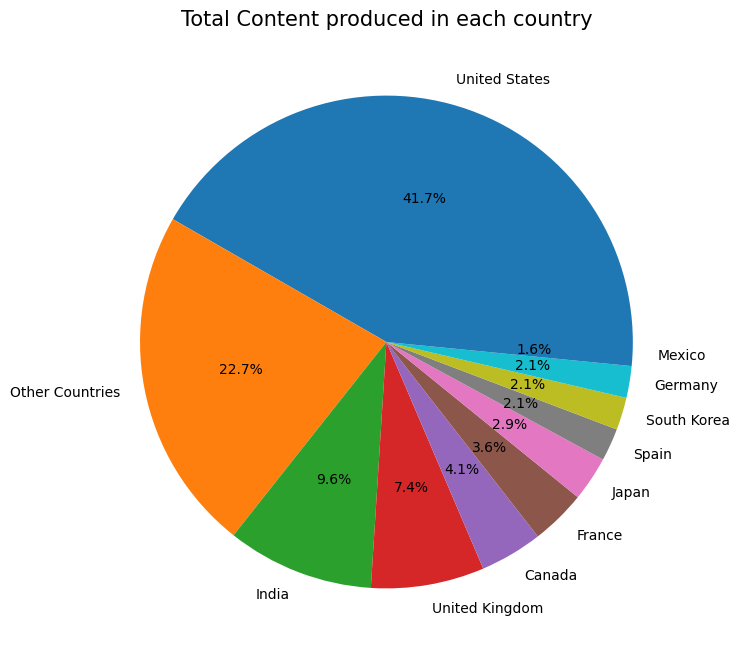

In [ ]:
x = country_df.cat.value_counts()
plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

* Observation:
    * United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
    * Maximum content of Netflix which is around 75% , is coming from these top 10 countries.  Rest of the world only contributes 25% of the content.

Total content distribution by release year of the content

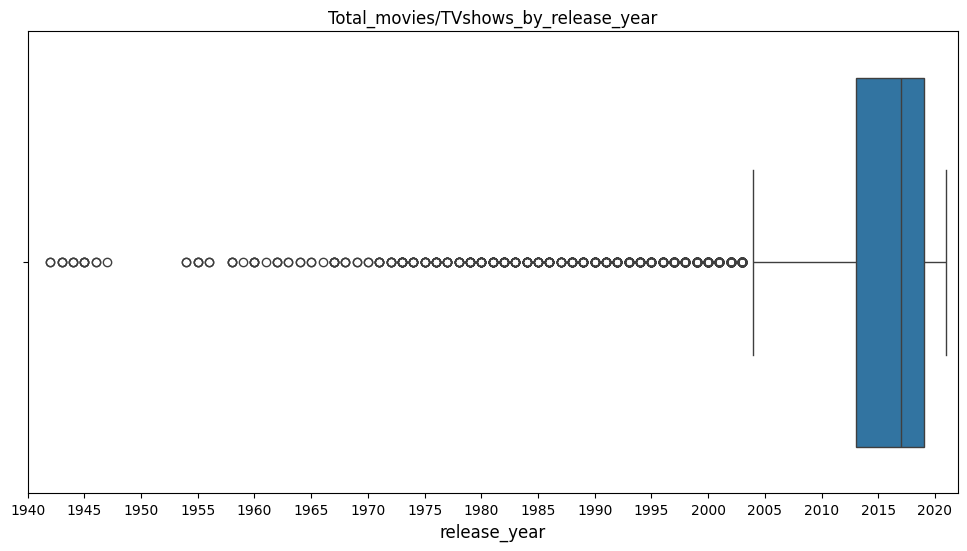

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data = netflix_df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

* Netflix have major content which is released in the year range 2000-2021
* It seems that the content older than year 2000 is almost missing from the Netflix.

Total movies/TV shows distribution by rating of the content

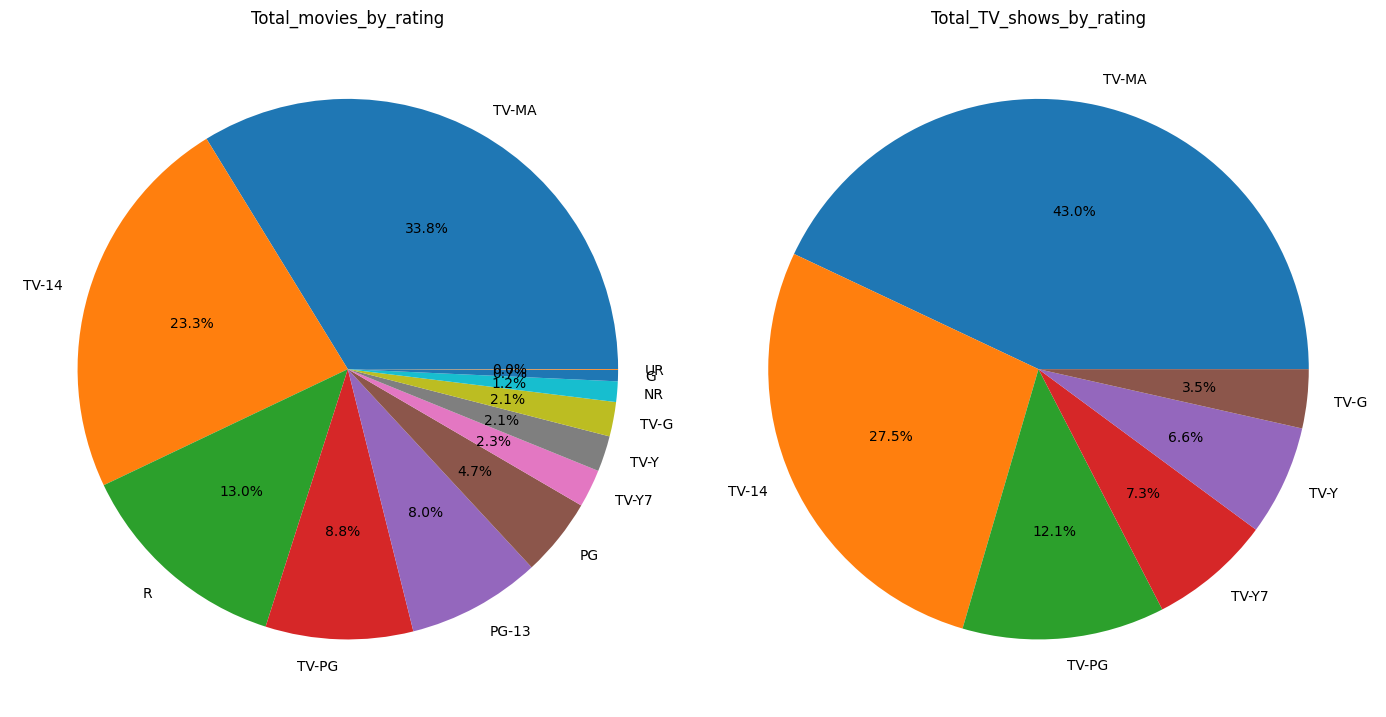

In [ ]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

Total movies/TV shows distribution by duration of the content

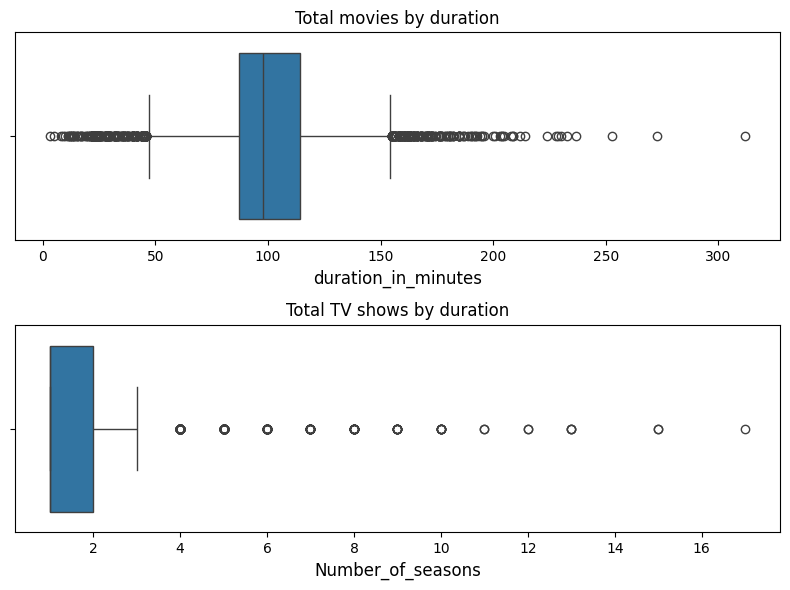

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

* Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)
* TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers

Total movies/TV shows in each Genre

Lets check the count for top 10 genres in Movies and TV_shows

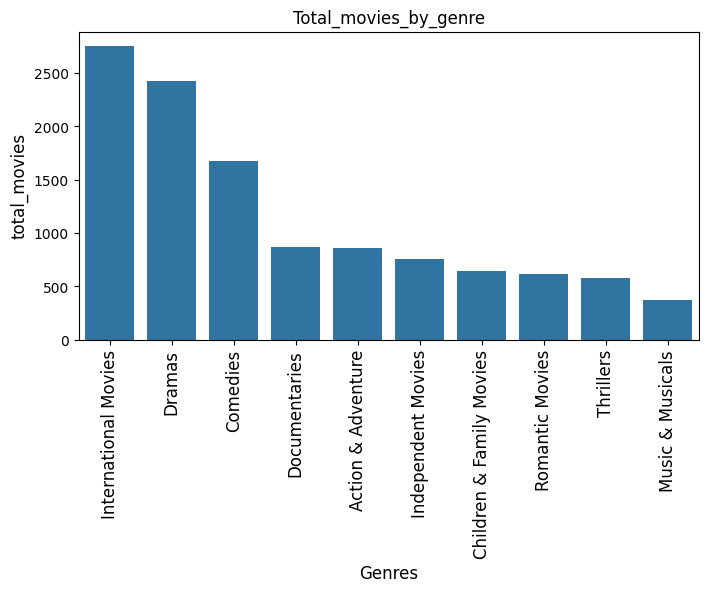

In [ ]:
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

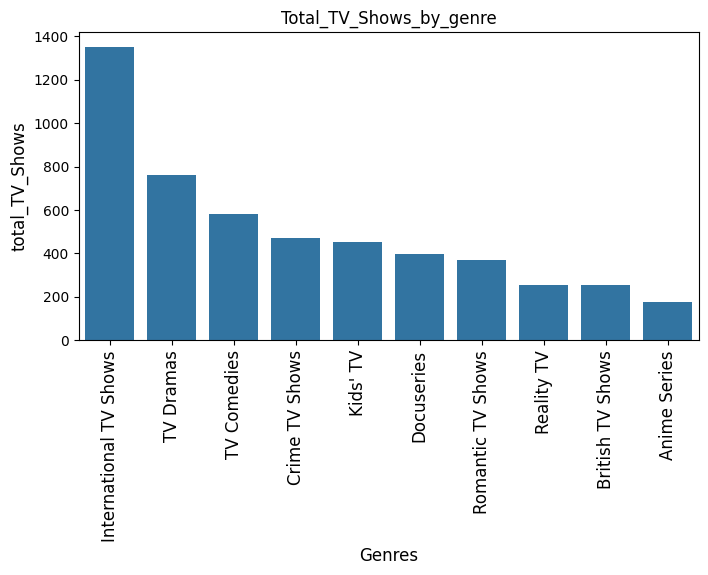

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

# Bivariate Analysis

Lets check popular genres in top 20 countries

Text(0.5, 1.0, 'Countries V/s Genres')

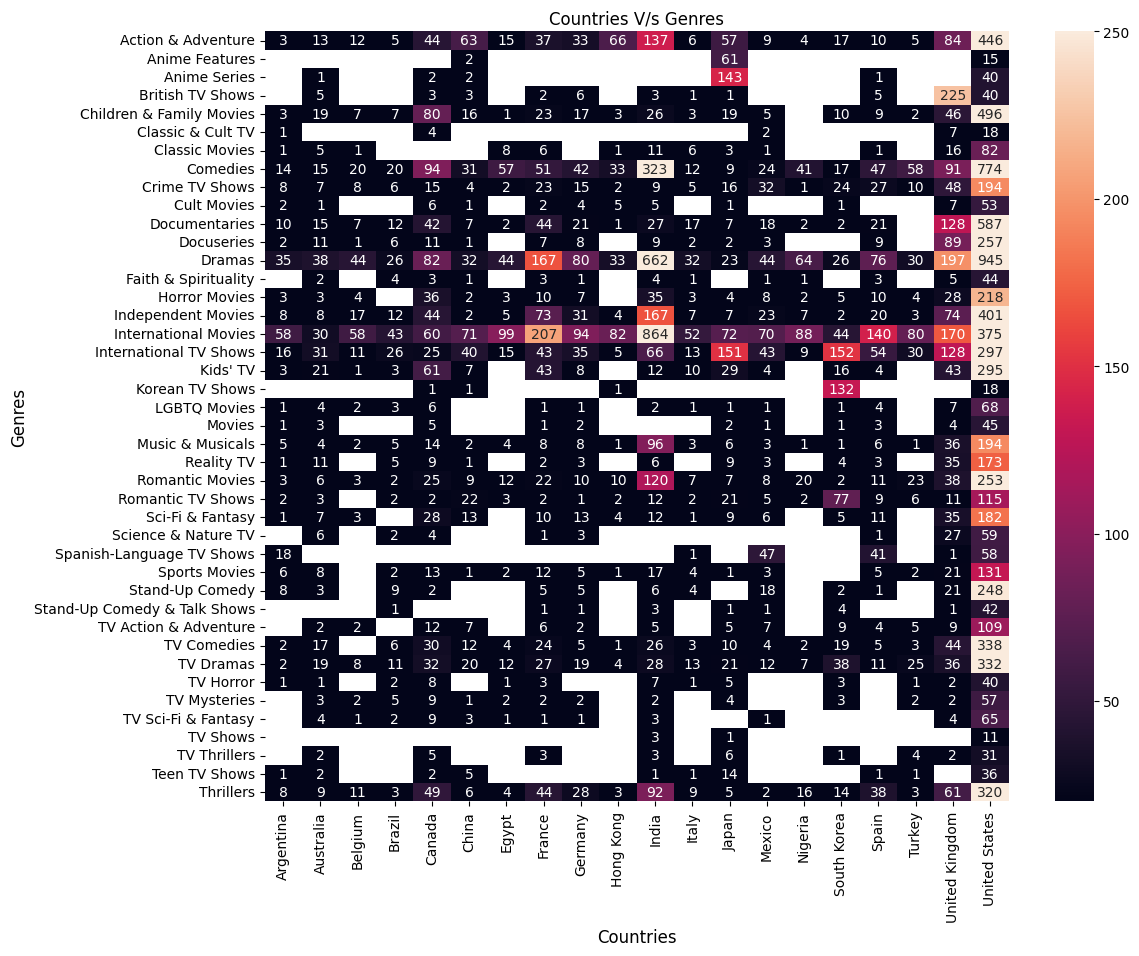

In [ ]:
top_20_country = country_df.country.value_counts().head(20).index
top_20_country = country_df.loc[country_df['country'].isin(top_20_country)]
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

United States and UK have a good mix of almost all genres.

Maximum International movies are produced in India.

Country-wise Rating of Content

In [ ]:
x = top_20_country.merge(netflix_df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

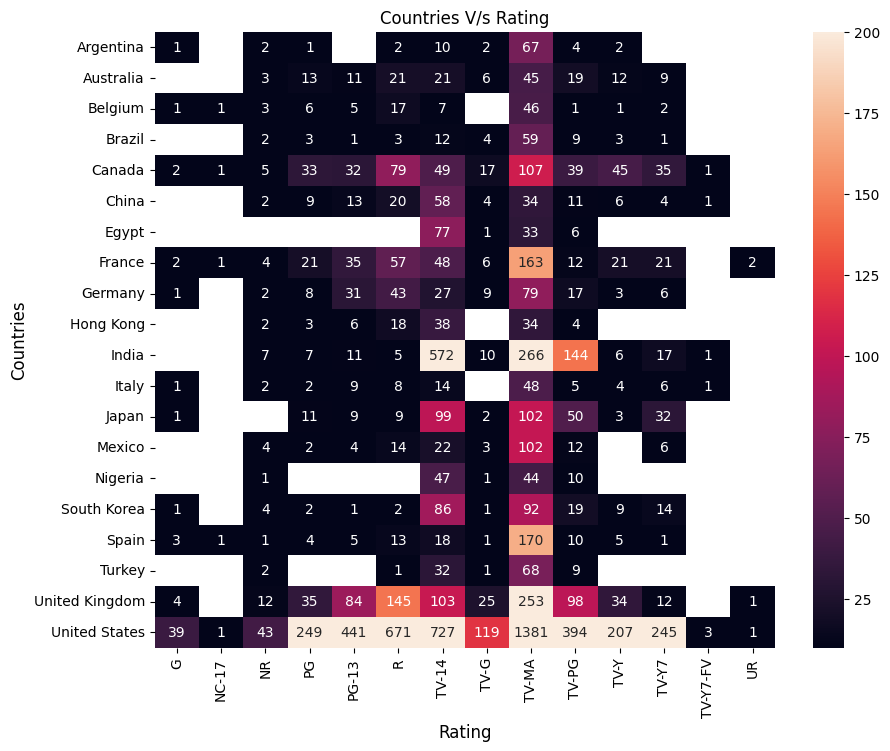

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

* Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
* India also has many titles rated TV-PG, other than TV-MA & TV-14.
* Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
* There is scarce content for general audience (TV-G & G) across all countries except US.

Top actors by country

In [ ]:
x = cast_df.merge(country_df , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
44862,United States,Julie Tejwani,348
50959,United States,Rupa Bhimani,347
50091,United States,Rajesh Kava,341
43933,United States,Jigna Bhardwaj,340
53520,United States,Vatsal Dubey,337


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

top 5 actors in top countries and their movies/tv shows count

In [ ]:
top_5_actors

,country,cast,show_id
0,United States,Julie Tejwani,348
1,United States,Rupa Bhimani,347
2,United States,Rajesh Kava,341
3,United States,Jigna Bhardwaj,340
4,United States,Vatsal Dubey,337
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

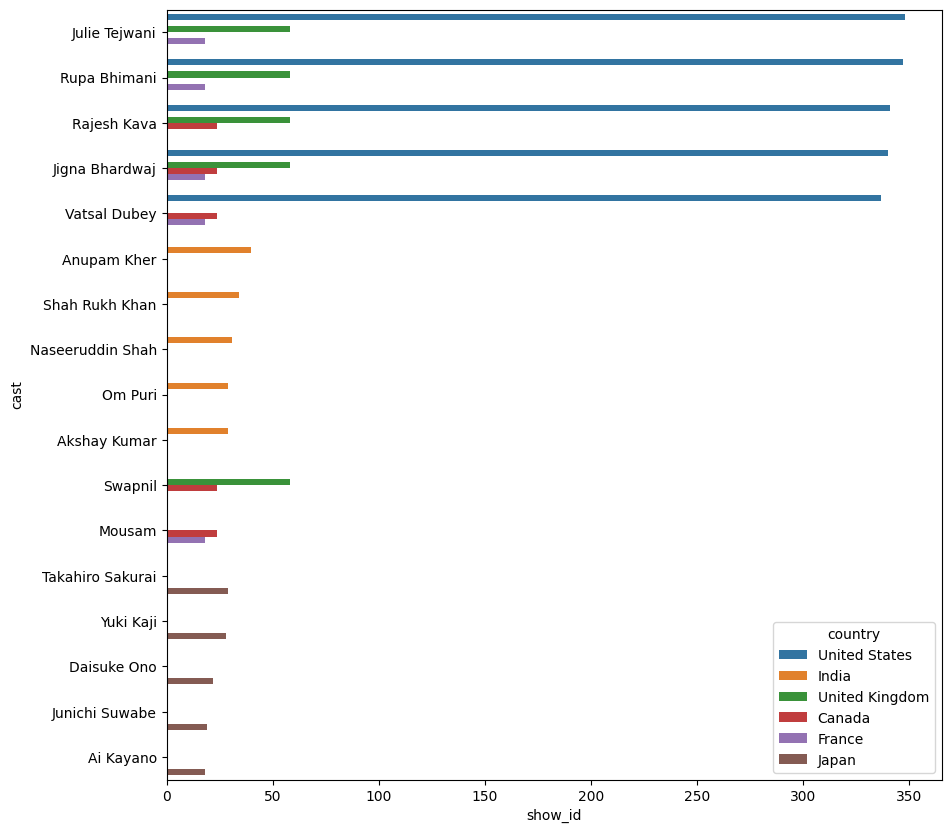

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

Top 5 directors by Genre

In [ ]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])
    
top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
505,Action & Adventure,Rajiv Chilaka,8
215,Action & Adventure,Hidenori Inoue,7
551,Action & Adventure,S.S. Rajamouli,7
652,Action & Adventure,Toshiya Shinohara,7
1218,Children & Family Movies,Rajiv Chilaka,58
1306,Children & Family Movies,Suhas Kadav,16
1214,Children & Family Movies,Prakash Satam,7
1244,Children & Family Movies,Robert Rodriguez,7
1291,Children & Family Movies,Steve Ball,6


Top 5 genres in each country

In [ ]:
x = genre_tb.merge(country_df , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [ ]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,945
1,United States,Comedies,774
2,United States,Documentaries,587
3,United States,Children & Family Movies,496
4,United States,Action & Adventure,446
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


Variation in duration of movies by Release year

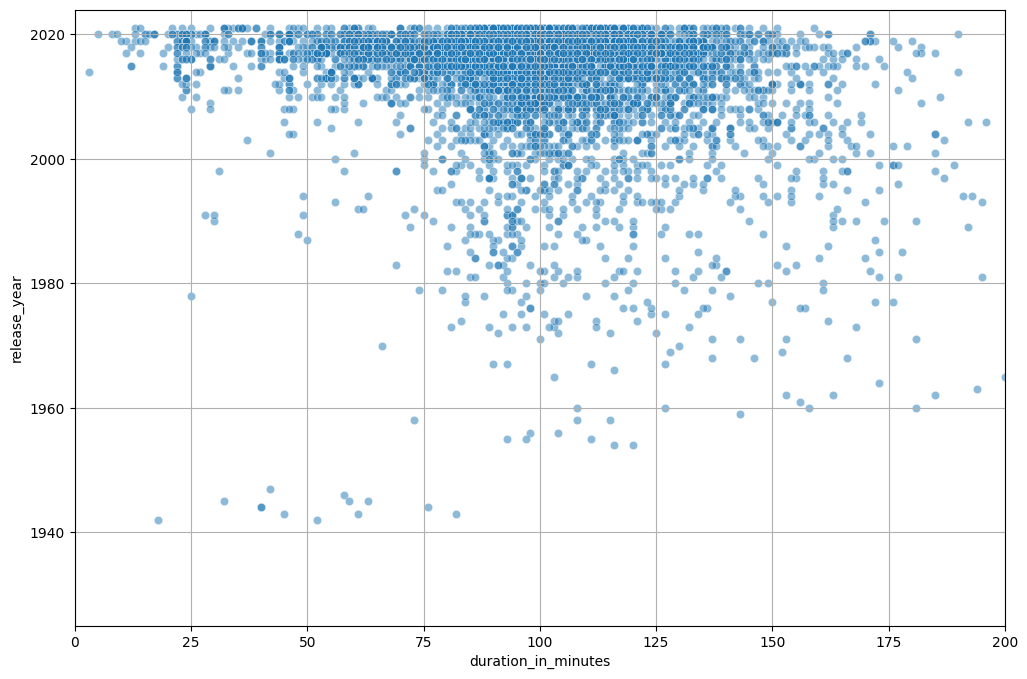

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=movies['duration_in_minutes'], y=movies['release_year'], alpha=0.5)
plt.xlim(0, 200) 
plt.ylim(1925, 2024) 
plt.grid(True)
plt.show()

* Observation
    * The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
    * There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

* What is the best time of the year when maximum content get added on the Netflix?

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

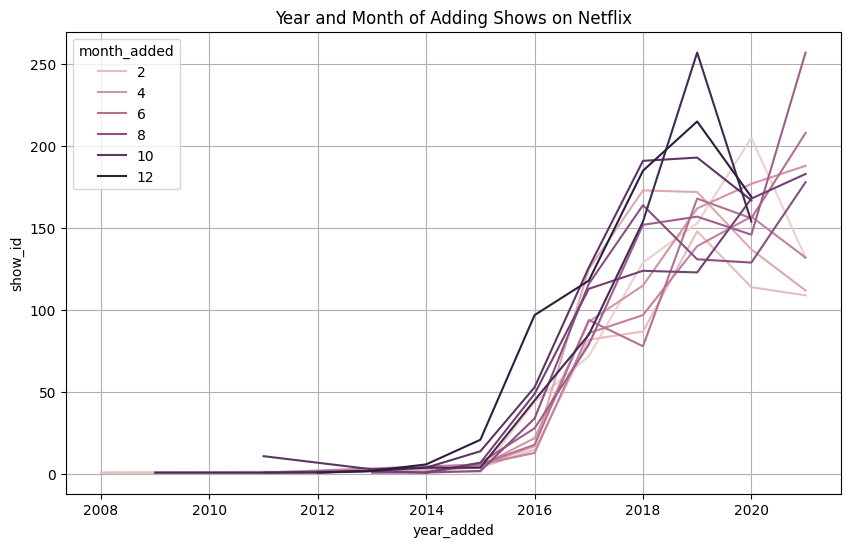

In [ ]:
month_year = netflix_df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.grid(True)
plt.title('Year and Month of Adding Shows on Netflix')

* The number of shows getting added is increasing with each year until 2020.
* Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

Which countries are adding more number of content over the time?

In [ ]:
country_list = country_df.country.value_counts().head(12).index
top_12_country = country_df.loc[country_df['country'].isin(country_list)]
country_year = top_12_country.merge(netflix_df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

<Axes: xlabel='year_added', ylabel='show_id'>

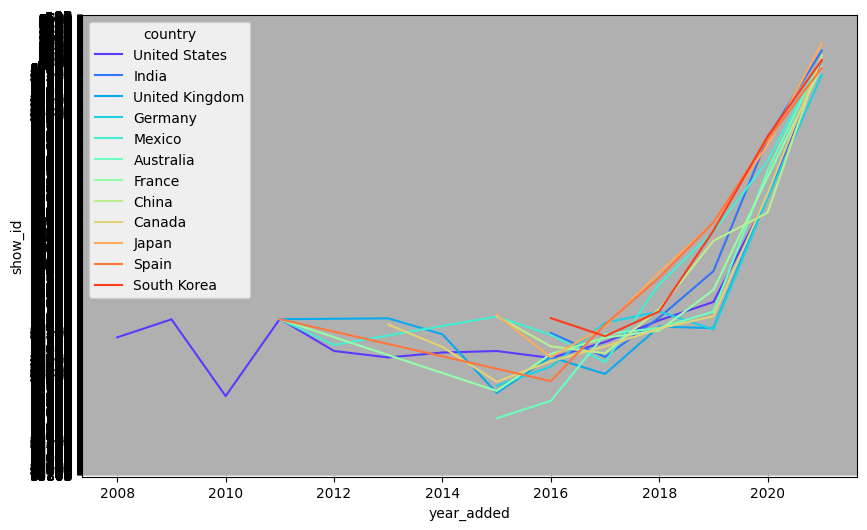

In [ ]:
plt.figure(figsize = (10,6))
plt.grid(True)
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation : 
United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

In [ ]:
country_year.columns

Index(['show_id', 'country', 'type', 'year_added'], dtype='object')

In [ ]:
movie_type = country_year.loc[country_year.type == 'Movie'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()
tv_type = country_year.loc[country_year.type == 'TV Show'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

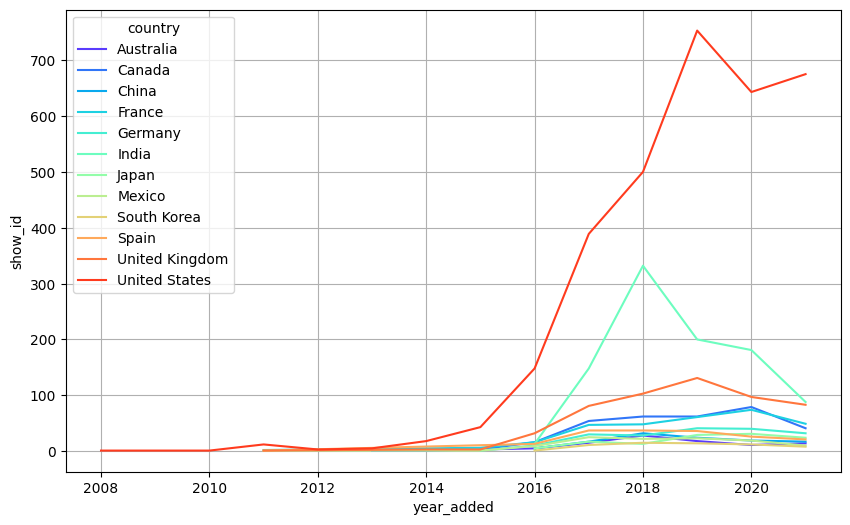

In [ ]:
plt.figure(figsize = (10,6))
plt.grid(True)
sns.lineplot(data = movie_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

<Axes: xlabel='year_added', ylabel='show_id'>

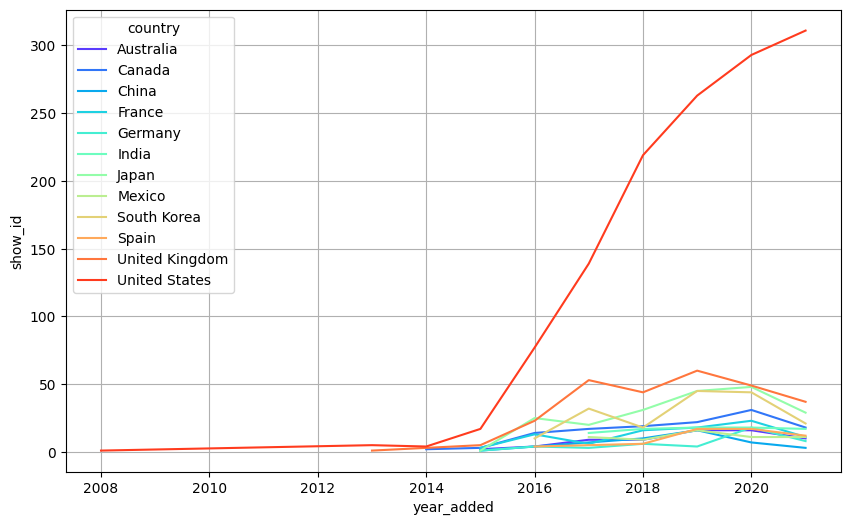

In [ ]:
plt.figure(figsize = (10,6))
plt.grid(True)
sns.lineplot(data = tv_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation: 
It is observed that United States tops in both movies and TV Shows. India is at 2nd positon in movies but In TV shows United Kingdom is at 2nd position, followed by India ,South Korea , Australia. 
It shows in countries like United Kingdom , South Korea , Australia TV Shows popularity is rising more than movies

# Insights based on Non-Graphical and Visual Analysis 

* Around 70% content on Netflix is Movies and around 30% content is TV shows.
* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014. 
* Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies. 
* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly.  Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
* Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
* Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
* The release year for shows is concentrated in the range 2005-2021.
* 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
* 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
* various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
* Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
* Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
*  Shorter duration movies have been popular in last 10 years.




# Business Insights 

* Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
* Maximum content (more than 80%) is 
    * TV-MA - Content intended for mature audiences aged 17 and above.
    * TV-14 - Content suitable for viewers aged 14 and above.
    * TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
    * R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13.
It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.
* Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
* Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
* Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3)
This can be considered while production of new content on Netflix.
* drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.




# Recommendations

* Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region.
eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

* Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
    * The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group . 